In [1]:
import os
import os.path
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from skimage.color import rgb2lab, lab2rgb
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import asarray
from PIL import Image
from os import listdir
from numpy import savez_compressed
from numpy import load
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = '/content/drive/MyDrive/dataset/archive'
files = os.listdir(dir)

In [4]:
len(files)

4321

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


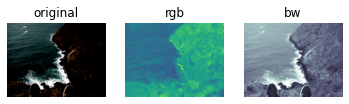

In [39]:
from numpy.random import randint
from skimage.transform import resize

ix = randint(0, len(files))
randomImage = load_img(os.path.join(dir, files[ix]))
randomImage = img_to_array(randomImage)
orig_img = (randomImage-127.5)/127.5
randomImage = rgb2lab(randomImage)
bw_img , rgb_img = randomImage[:,:,0], randomImage[:,:,1:]/128
bw_img = bw_img.reshape(bw_img.shape+(1,))
images =  [orig_img, rgb_img, bw_img]
titles = ["original", "rgb", "bw"]
for i in range(3):
  pyplot.subplot(1,3,i+1)
  if(i==1 ):
    pyplot.imshow(images[i][:,:,0])
  elif(i==2):
    pyplot.imshow(images[i][:,:,0], cmap="bone")  
  else :
    pyplot.imshow(images[i])
  pyplot.title(titles[i])
  pyplot.axis('off')
pyplot.show()


In [6]:
def load_images(path, size=(64,64)):
  rgb_list, bw_list= list(),list()
  count=0;
  for i in range(800):
    idx = randint(0, len(files))
    pixels = load_img(os.path.join(path, files[idx]), target_size=size)
    pixels = img_to_array(pixels)
    pixels = rgb2lab(pixels)
    bw_img , rgb_img = pixels[:,:,0], pixels[:,:,1:]/128
    bw_img = bw_img.reshape(bw_img.shape+(1,))
    rgb_list.append(rgb_img)
    bw_list.append(bw_img)
  return [asarray(bw_list), asarray(rgb_list)]


In [8]:
[bw_images, rgb_images] = load_images(dir)

In [9]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [10]:
filename = 'dataset.npz'
savez_compressed(filename, bw_images, rgb_images)

In [11]:
!ls

archive  dataset.npz  train_set.npz


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [81]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 256)        

In [83]:
dataset=load('dataset.npz')
X_train=dataset['arr_0']
Y_train=dataset['arr_1']

In [84]:
print(X_train.shape)
print(Y_train.shape)

(800, 64, 64, 1)
(800, 64, 64, 2)


In [85]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='mae', optimizer=opt, metrics=['accuracy'])


In [86]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=200, batch_size=100)



Epoch 1/200
8/8 [==============================] - 1s 87ms/step - loss: 7.0423 - accuracy: 0.5763 - val_loss: 6.9043 - val_accuracy: 0.6516
Epoch 2/200
8/8 [==============================] - 0s 50ms/step - loss: 6.9798 - accuracy: 0.6333 - val_loss: 6.9030 - val_accuracy: 0.6537
Epoch 3/200
8/8 [==============================] - 0s 50ms/step - loss: 6.9814 - accuracy: 0.6227 - val_loss: 6.9038 - val_accuracy: 0.6621
Epoch 4/200
8/8 [==============================] - 0s 50ms/step - loss: 6.9730 - accuracy: 0.6386 - val_loss: 6.9007 - val_accuracy: 0.6593
Epoch 5/200
8/8 [==============================] - 0s 51ms/step - loss: 6.9706 - accuracy: 0.6400 - val_loss: 6.8988 - val_accuracy: 0.6661
Epoch 6/200
8/8 [==============================] - 0s 49ms/step - loss: 6.9672 - accuracy: 0.6446 - val_loss: 6.8923 - val_accuracy: 0.6633
Epoch 7/200
8/8 [==============================] - 0s 50ms/step - loss: 6.9628 - accuracy: 0.6461 - val_loss: 6.8814 - val_accuracy: 0.6700
Epoch 8/200
8/8 [===

In [88]:
model.save('/content/drive/MyDrive/model/color.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/color.model/assets


In [87]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(64,64))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((64, 64, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  img=img_to_array(img)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  for i in range(2):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      if(i==0):
        plt.imshow(images[i][:,:,0], cmap="bone")
      else:
        plt.imshow(images[i])   
      plt.axis("off")  
  plt.show()
 

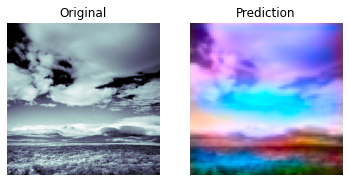

In [90]:
predict('/content/drive/MyDrive/dataset/archive/00000145.jpg')

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 298 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


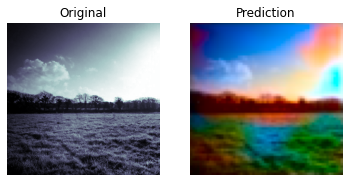

In [92]:
predict('/content/drive/MyDrive/dataset/archive/00000138.jpg')